In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Please Note: Change the path of the file while running the code in other Machines

In [8]:
#we opt for some numerical columns
df_num = pd.read_csv("/content/drive/MyDrive/DSML_Proj/data/clean_trn_data_ann_num.csv")

#we opt for some categorical columns
cat = 'pl_letter	discoverymethod	disc_locale	disc_facility	disc_telescope	disc_instrument	pl_tsystemref	st_metratio'
df = pd.read_csv("/content/drive/MyDrive/DSML_Proj/data/cleaned train data.csv")
df_cat = df[cat.split()]

#we read the target variables
Y = pd.read_csv("/content/drive/MyDrive/DSML_Proj/data/cleaned train labels.csv")

In [9]:
df_num.shape

(17969, 44)

In [12]:
df_cat.shape

(15775, 8)

In [13]:
Y.shape

(15775, 1)

## Working on numerical data 

In [14]:
df_num.head()

,Unnamed: 0,pl_orbper,pl_rade,pl_masse,pl_msinie,pl_cmasse,pl_bmasse,pl_bmassprov,pl_dens,pl_orbeccen,...,pl_trueobliq,pl_projobliq,pl_orblper,pl_orbtper,pl_occdep,pl_bmassj,pl_cmassj,pl_msinij,pl_massj,pl_radj
0,0,18.859019,3.24,13.60000,323.8618,0.030595,13.60000,0.0,2.30,0.0,...,20.0,0.0,114.9,2453932.2,0.0,0.04279,0.4495,1.108,0.04279,0.289
1,1,10.358632,1.80,178.30263,323.8618,0.030595,287.97699,0.0,0.91,0.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
2,2,1.045623,1.37,178.30263,323.8618,0.030595,287.97699,0.0,0.91,0.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
3,3,5.902247,2.55,178.30263,323.8618,0.030595,287.97699,0.0,0.91,0.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.235
4,4,0.813140,1.15,178.30263,323.8618,0.030595,287.97699,0.0,0.91,0.0,...,20.0,0.0,114.9,2453932.2,0.0,0.82000,0.4495,1.108,0.61850,0.103


We can see the shape of Numerical data does not match our cleaned data, to do so we will eliminate some rows which do not match the index of our Categorical data

In [20]:
rows_not_used = []
for i in df_num.index:
  if i not in df_cat.index and i not in rows_not_used:
    rows_not_used.append(i)
df_num = df_num.drop(rows_not_used)

In [21]:
df_num.shape

(15775, 44)

## Working on Categorical data

Here, we replace the Empty spaces and Miss assigned value in categorical data with 'Null_Category' value

In [22]:
for i in range(len(df_cat.columns)):
  for j in df_cat.index:
    var = df_cat.iloc[j,i]
    if '</a>' in str(var):
      df_cat.iloc[j,i] = np.nan
      continue
    try:
      float(var)
      df_cat.iloc[j,i] = np.nan
      pass
    except:
      if ('201' in str(var)) or ('202' in str(var)):
        df_cat.iloc[j,i] = np.nan
        continue
df_cat = df_cat.fillna('Null_Category')
df_cat.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,pl_letter,discoverymethod,disc_locale,disc_facility,disc_telescope,disc_instrument,pl_tsystemref,st_metratio
0,c,Transit,Space,Transiting Exoplanet Survey Satellite (TESS),0.1 m TESS Telescope,TESS CCD Array,BJD,Null_Category
1,b,Transit,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,BJD,[Fe/H]
2,d,Transit,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,BJD,[Fe/H]
3,e,Transit,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,BJD,[Fe/H]
4,b,Transit,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,BJD,[Fe/H]


Here, we change the categorical data as follows:


1.   We change the categories listed to numerical values using Label Encoder
2.   Then we use OneHotEncoding in order to use the categorical data for our models



In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = df_cat.iloc[:,:].values
for i in range(X.shape[1]):
  X[:,i] = LabelEncoder().fit_transform(X[:,i])
X = OneHotEncoder(drop = 'if_binary').fit_transform(X).toarray()

In [24]:
df_cat.head()

,pl_letter,discoverymethod,disc_locale,disc_facility,disc_telescope,disc_instrument,pl_tsystemref,st_metratio
0,1,9,3,51,0,65,0,0
1,0,9,3,22,11,44,0,1
2,2,9,3,22,11,44,0,1
3,3,9,3,22,11,44,0,1
4,0,9,3,16,11,44,0,1


In [25]:
X.shape

(15775, 243)

In [26]:
X = np.hstack((df_num.iloc[:,:].values,X))

Here, we split our training sample space into a training and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #test_size 0.2 means 20% of data be test dataset

#do feature scalling
#feature scalling means make a scala on the variables be same
#if the scala each variable is not same, it will make problem to ML model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying ANN

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#initialize NN using sequential, defining sequence of layer
ANN_reg_1 = Sequential() 

ANN_reg_1.add(Dense(units = 256, kernel_initializer="he_uniform",	activation="relu", input_dim = X_train.shape[1]))

#adding hidden layers

ANN_reg_1.add(Dense(units = 128, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_1.add(Dense(units = 64, kernel_initializer="he_uniform", activation="relu"))

#adding output layer
ANN_reg_1.add(Dense(units = 1,	activation="linear"))

#compiling ANN, basically applying stochastic gradient descent
opt = SGD(lr=0.006, momentum=0.9)
ANN_reg_1.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [31]:
model1 = ANN_reg_1.fit(X_train,	Y_train,	batch_size=15, epochs=200)

Epoch 1/200
842/842 [==============================] - 5s 4ms/step - loss: 0.1368 - mse: 6971.8896
Epoch 2/200
842/842 [==============================] - 3s 4ms/step - loss: 0.0830 - mse: 6729.4434
Epoch 3/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0601 - mse: 6520.3828
Epoch 4/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0544 - mse: 6433.9067
Epoch 5/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0515 - mse: 6301.8784
Epoch 6/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0484 - mse: 6293.3193
Epoch 7/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0463 - mse: 6065.2544
Epoch 8/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0452 - mse: 5956.4463
Epoch 9/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0441 - mse: 5866.6519
Epoch 10/200
842/842 [==============================] - 2s 2ms/step - loss: 0.0427 - mse: 5793.9722
Epoch 11/

In [34]:
test_1 = ANN_reg_1.evaluate(X_test, Y_test, verbose=0)
print("Loss (Logarithmic Mean Sqaure Error) : ",test_1[0])
print("Root Mean Squared Error : ",np.sqrt(test_1[1]))

Loss (Logarithmic Mean Sqaure Error) :  0.07989131659269333
Root Mean Squared Error :  21.522851200045427


In [35]:
#initialize NN using sequential, defining sequence of layer
ANN_reg_2 = Sequential() 

ANN_reg_2.add(Dense(units = 256, kernel_initializer="he_uniform",	activation="relu", input_dim = X_train.shape[1]))

#adding hidden layers

ANN_reg_2.add(Dense(units = 128, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_2.add(Dense(units = 64, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_2.add(Dense(units = 128, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_2.add(Dense(units = 64, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_2.add(Dense(units = 128, kernel_initializer="he_uniform", activation="relu"))
ANN_reg_2.add(Dense(units = 64, kernel_initializer="he_uniform", activation="relu"))

#adding output layer
ANN_reg_2.add(Dense(units = 1,	activation="linear"))

#compiling ANN, basically applying stochastic gradient descent
opt = SGD(lr=0.001, momentum=0.9)
ANN_reg_2.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [36]:
model2 = ANN_reg_2.fit(X_train,	Y_train,	batch_size=10, epochs=300)

Epoch 1/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.2307 - mse: 7052.5146
Epoch 2/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.1690 - mse: 7031.2651
Epoch 3/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0854 - mse: 6948.5713
Epoch 4/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0651 - mse: 6866.9590
Epoch 5/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0568 - mse: 6731.9937
Epoch 6/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0523 - mse: 6639.9722
Epoch 7/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0494 - mse: 6509.2905
Epoch 8/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0488 - mse: 6471.5645
Epoch 9/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0465 - mse: 6420.8350
Epoch 10/300
1262/1262 [==============================] - 3s 2ms/step - loss: 0.0452 - mse:

In [39]:
test_2 = ANN_reg_2.evaluate(X_test, Y_test, verbose=0)
print("Loss (Logarithmic Mean Sqaure Error) : ",test_2[0])
print("Root Mean Squared Error : ",np.sqrt(test_2[1]))

Loss (Logarithmic Mean Sqaure Error) :  0.07976552098989487
Root Mean Squared Error :  44.90731965279644


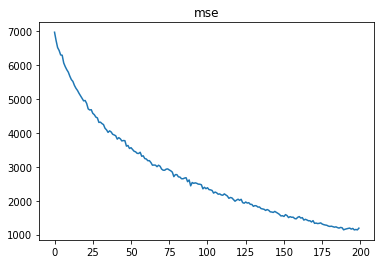

In [40]:
plt.title('mse')
plt.plot(model1.history['mse'],label='model1')

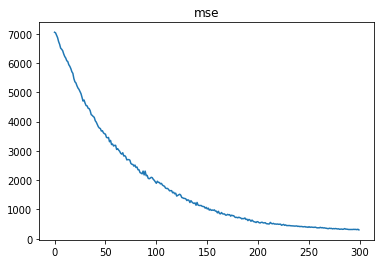

In [43]:
plt.title('mse')
plt.plot(model2.history['mse'],label='model2')

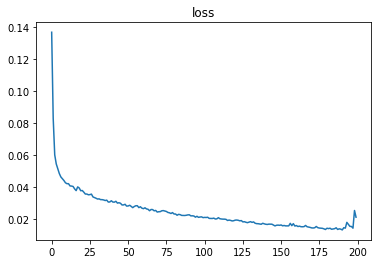

In [44]:
plt.title('loss')
plt.plot(model1.history['loss'],label='model1')

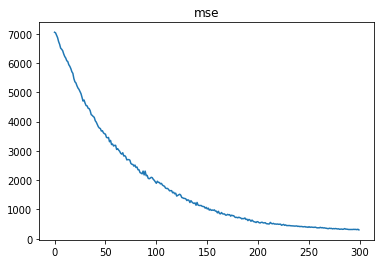

In [45]:
plt.title('mse')
plt.plot(model2.history['mse'],label='model2')